<a href="https://colab.research.google.com/github/gokul-prathap-git/DSAIRPFeb25/blob/session1/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data preprocessing

In [5]:
pip install scikit-learn

Import libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [26]:
data = pd.read_csv("beer-servings.csv",index_col=False)

In [27]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [28]:
data.shape

(193, 7)

In [29]:
data = data.iloc[:,1:]

In [30]:
data.shape

(193, 6)

In [20]:
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,25.0,0.0,14.0,0.7,Africa
3,245.0,138.0,312.0,12.4,Europe
4,217.0,57.0,45.0,5.9,Africa


Dropping duplicate rows if any

In [31]:
duplicated_rows = data.duplicated()

In [32]:
duplicated_rows.sum()

np.int64(0)

In [33]:
data.drop_duplicates(inplace=True)

In [34]:
data.shape

(193, 6)

Checking misssing values

In [35]:
data.isna()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
188,False,True,False,False,False,False
189,False,False,False,False,False,False
190,False,False,False,False,False,False
191,False,False,False,False,False,False


In [36]:
data.isna().sum()

,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


<function matplotlib.pyplot.show(close=None, block=None)>

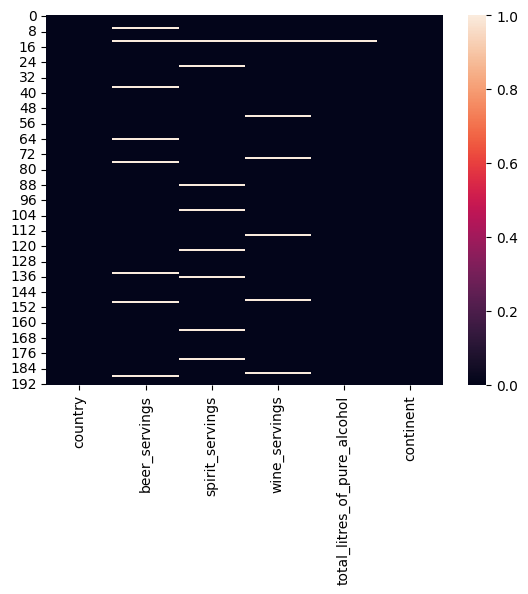

In [38]:
sns.heatmap(data.isna())
plt.show

Dropping rows with missing values

In [39]:
# data.dropna()
# data.dropna(inplace=True)

Handling misssing values

Splitting numerical and categorical columns

In [40]:
num_df = data.select_dtypes(include="number")
cat_df = data.select_dtypes(include="object")

In [41]:
print("Numerical columns are")
num_cols = num_df.columns
print(num_cols)

print("Categorical columns are")
cat_cols = cat_df.columns
print(cat_cols)

Numerical columns are
Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')
Categorical columns are
Index(['country', 'continent'], dtype='object')


Check histograms of numerical columns for data imputation

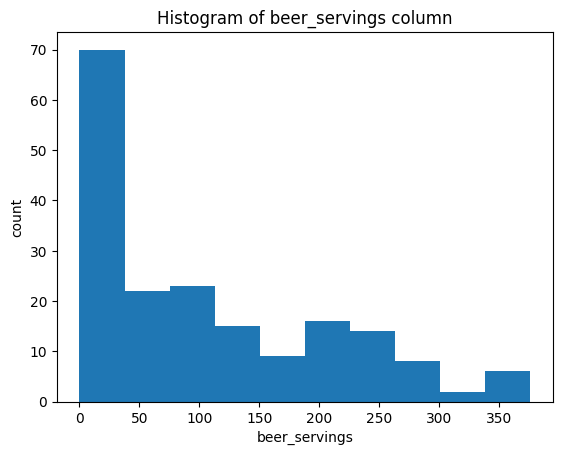

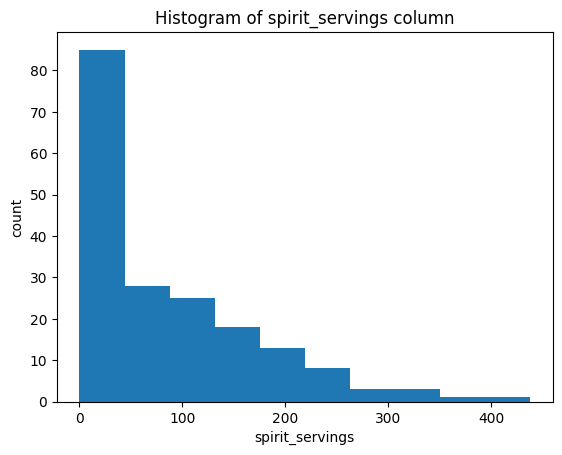

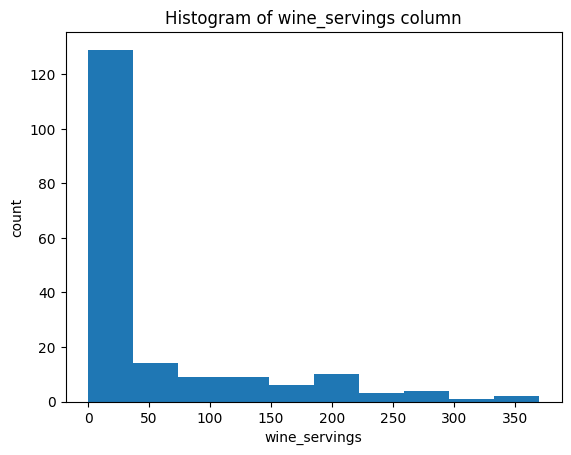

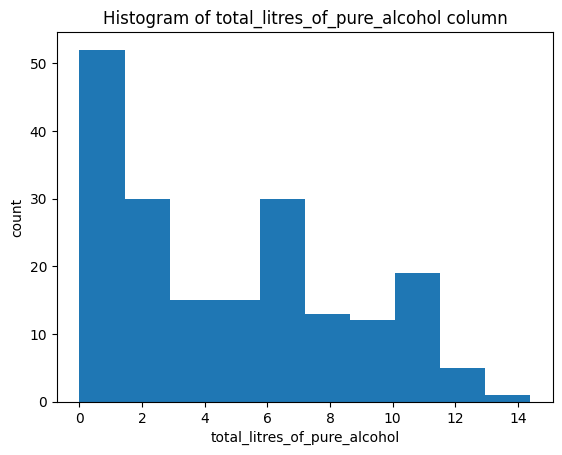

In [43]:
for col in num_cols:
    plt.hist(num_df[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

Filling missing values numerical columns

In [44]:
for col in num_cols:
    num_df[col] = num_df[col].fillna(num_df[col].median())

In [45]:
num_df.isna().sum()

,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0


Filling missing values for categorical columns

In [59]:
for col in cat_cols :
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode()[0])

In [60]:
cat_df.isna().sum()

,0
country,0
continent,0


checking duplicate columns

In [50]:
dup_cols = data.columns[data.columns.duplicated()]
data = data.loc[:,~data.columns.duplicated()]

Checking duolicate columns visually

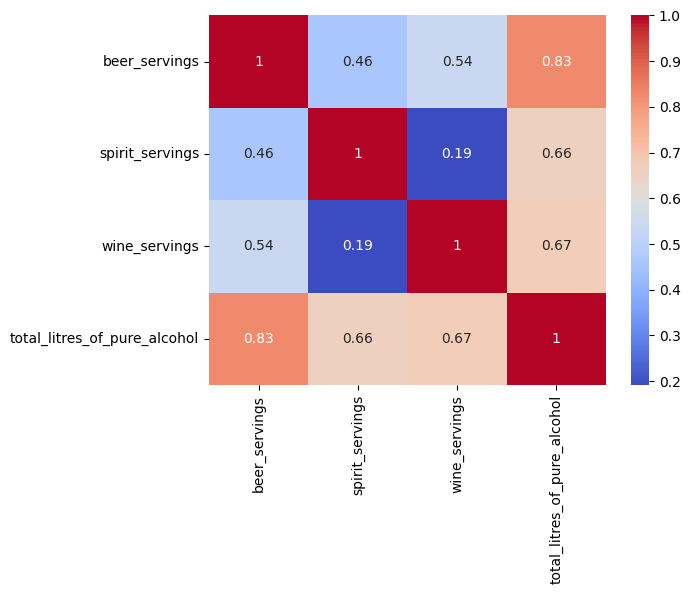

In [52]:
sns.heatmap(num_df.corr(),annot=True,cmap="coolwarm")
plt.show()

Outlier Handling

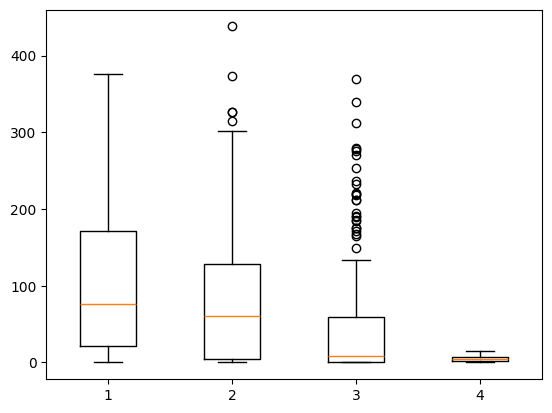

In [53]:
plt.boxplot(num_df)
plt.show()

In [54]:
def remove_outliers(df,column_name):
  q1 = df[column_name].quantile(0.25)
  q3 = df[column_name].quantile(0.75)
  iqr = q3-q1
  upper_bound = q3 + 1.5*iqr
  lower_bound = q1 - 1.5*iqr
  df[column_name] = df[column_name].clip(upper=upper_bound)
  df[column_name] = df[column_name].clip(lower=lower_bound)
  return df[column_name]

In [55]:
for col in num_cols:
  num_df[col] = remove_outliers(num_df,col)

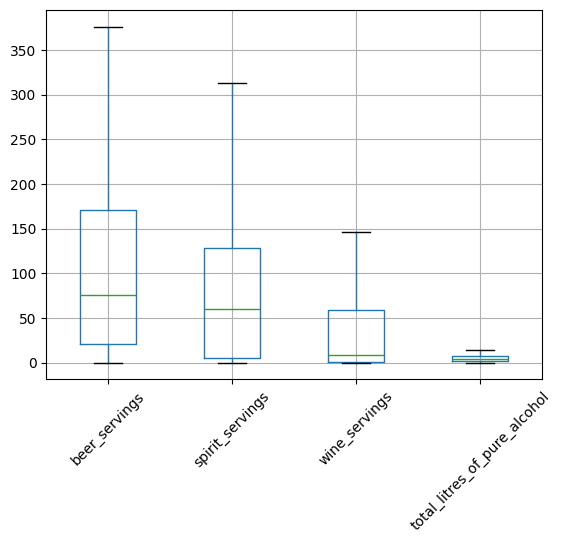

In [56]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [57]:
data =pd.concat([num_df,cat_df],axis=1)

Checking data imbalance

In [61]:
data['continent'].value_counts()

,count
continent,
Africa,53
Europe,45
Asia,44
North America,23
Oceania,16
South America,12


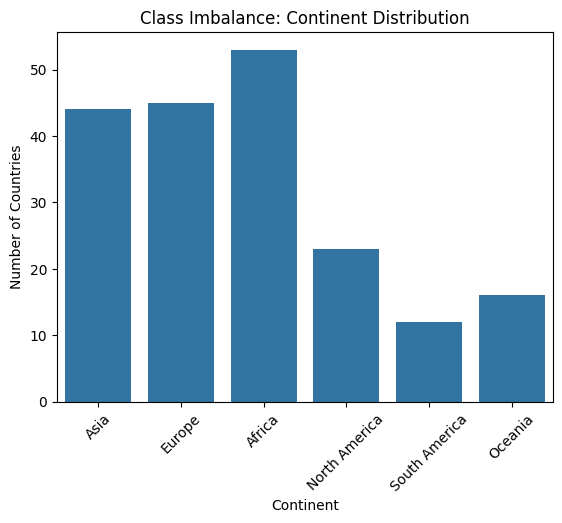

In [63]:
sns.countplot(x='continent',data =data)
plt.title('Class Imbalance: Continent Distribution')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)
plt.show()

In [65]:
pip install imblearn

In [66]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

x=data.drop('continent',axis=1)
y=data['continent']

oversampler = RandomOverSampler(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

x_resampled, y_resampled = oversampler.fit_resample(x,y)

continent
Asia             53
Europe           53
Africa           53
North America    53
South America    53
Oceania          53
Name: count, dtype: int64


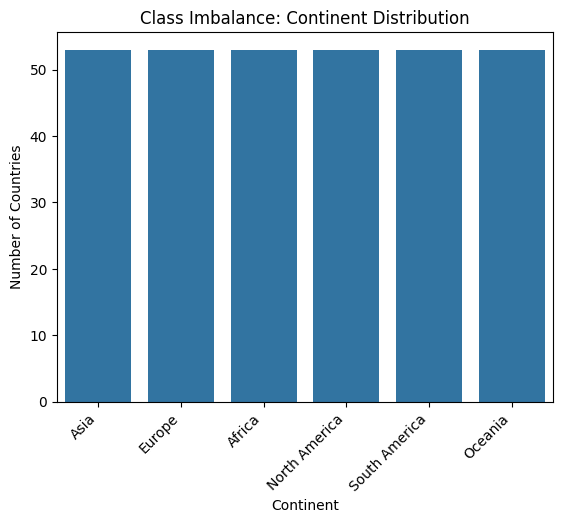

In [67]:
# create a new balanced dataframe
balanced_data = pd.DataFrame(x_resampled, columns=x.columns)
balanced_data['continent'] = y_resampled

# check the class distribution after resampling
print(balanced_data['continent'].value_counts())

sns.countplot(x='continent',data =balanced_data)
plt.title('Class Imbalance: Continent Distribution')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45,ha='right')
plt.show()